# 통계 기반 시계열 모델링과 딥러닝 기반 시계열 모델링
---


## 1. **통계 기반 시계열 모델링**  
**핵심 기법**  
- **ARIMA**: 자기회귀(AR), 차분(I), 이동평균(MA)을 결합해 비정상성 데이터 처리
- **SARIMA(Seasonal ARIMA)**: 계절성 패턴을 추가로 고려한 ARIMA 확장 모델
- **지수평활법**: 최근 데이터에 가중치를 부여해 단기 예측에 강점
- **시계열 분해**: 추세(Trend), 계절성(Seasonality), 불규칙성(Irregular)으로 분해

**장점**  
- **해석 용이성**: 모델 파라미터가 통계적 의미를 명확히 전달
- **소규모 데이터 적합**: 적은 데이터로도 안정적인 성능
- **계산 효율성**: 복잡한 연산 없이 빠른 예측 가능, 소규모 데이터(1만 개 미만)에서 높은 예측 정확도

**단점**  
- **비선형 관계 한계**: 선형 가정으로 복잡한 패턴 포착 어려움
- **수동 전처리 필요**: 정상성 확보를 위한 차분 및 변환 필수
- **장기 의존성 처리 부족**: 긴 시퀀스 데이터 예측에 취약

---

### ARIMA
- ARIMA(Autoregressive Integrated Moving Average) 모델은 **시계열 데이터의 분석 및 예측**에 널리 사용되는 통계적 모델
- 이 모델은 과거의 관측값(AR), 잔차(I), 이동평균(MA)을 결합하여 미래 값을 예측함.
---
#### **ARIMA의 구성 요소**
1. **AR (AutoRegressive, 자기회귀)**  
   - 과거 관측값(자기 자신)의 선형 결합으로 현재 값을 설명함.
   - 예: 오늘의 값이 어제, 그저께 값에 영향을 받음.
   - **p**: 사용할 시차(lag) 개수

2. **I (Integrated, 차분)**  
   - 데이터의 비정상성(추세, 계절성 등)을 제거하기 위해 관측값 간의 차이를 계산함.
   - 예: 오늘 값에서 어제 값을 빼서 새로운 시계열 생성.
   - **d**: 차분(differencing) 횟수 (몇 번 차분하면 정상성이 되는지)

3. **MA (Moving Average, 이동평균)**  
   - 과거 예측 오차(잔차)의 선형 결합으로 현재 값을 설명함.
   - 예: 과거 예측이 얼마나 틀렸는지 반영하여 보정.
   - **q**: 사용할 잔차(lagged error) 개수

---

#### **ARIMA(p, d, q) 파라미터**

- **p**: 자기회귀(AR) 항의 시차(lag) 개수
- **d**: 차분(I) 횟수 (비정상성을 제거하기 위해)
- **q**: 이동평균(MA) 항의 시차(lag) 개수

예시:  
ARIMA(1,1,1)은 1차 자기회귀, 1차 차분, 1차 이동평균을 의미함.

---

#### **ARIMA의 전제 조건**

- **정상성(Stationarity)**:  
  데이터의 평균, 분산, 자기상관이 시간에 따라 일정해야 함.
  비정상성 데이터(추세, 계절성 등)는 차분을 통해 정상성으로 변환함.

---

#### **ARIMA 모델의 적용 절차**

1. **정상성 확인**  
   - 시계열이 정상적인지 ADF(augmented Dickey-Fuller) 테스트 등으로 확인
2. **차분(d) 결정**  
   - 정상성이 아닐 경우 몇 번 차분해야 정상성이 되는지 결정
3. **p, q 결정**  
   - ACF(Autocorrelation Function), PACF(Partial Autocorrelation Function) 그래프를 통해 적절한 lag 수 결정
4. **모델 학습 및 예측**  
   - ARIMA 모델을 학습시켜 미래 값을 예측

---

#### **활용 예시**

- 주가, 매출, 기온, 수요 등 시간에 따라 변화하는 데이터의 예측
- 계절성 없는 데이터에 적합 (계절성이 있으면 SARIMA 등 변형 모델 사용)


#### Python

In [ ]:
# ARIMA 실습을 위한 패키지 설치
%pip install statsmodels pandas numpy matplotlib

c:\Python3106\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 2)   Log Likelihood                1316.898
Date:                Sun, 04 May 2025   AIC                          -2621.797
Time:                        20:46:13   BIC                          -2602.007
Sample:                    01-01-2023   HQIC                         -2613.788
                         - 07-19-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9728   3.09e-05   9.62e+04      0.000       2.973       2.973
ar.L1          1.9981      0.000   6249.897      0.000       1.997       1.999
ar.L2         -0.9985      0.000  -3347.217      0.0

c:\Python3106\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


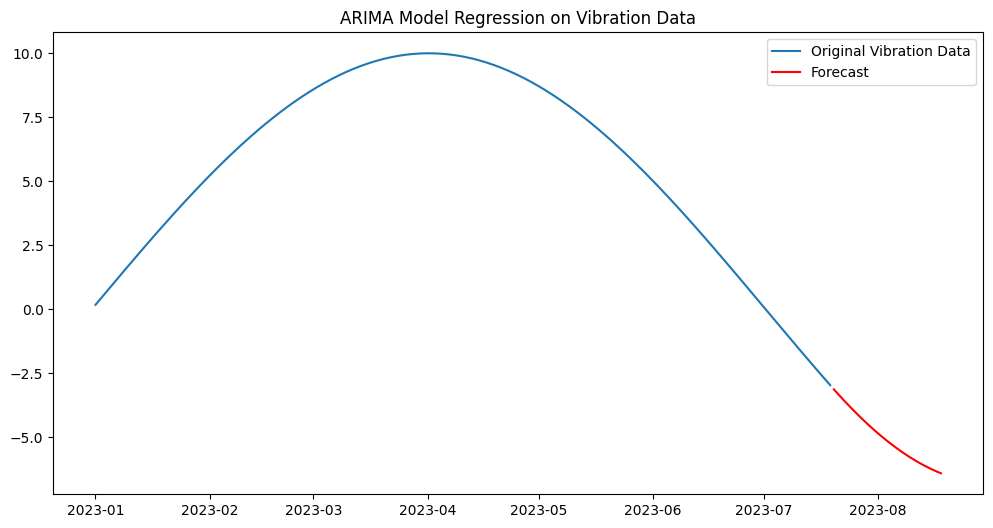

In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

# 진동 성질을 가진 데이터 생성 (사인파)
np.random.seed(42)
time_index = pd.date_range(start='2023-01-01', periods=200, freq='D')
vibration_data = 10 * np.sin(2 * np.pi * time_index.dayofyear / 365)
vibration_series = pd.Series(vibration_data, index=time_index)

# ARIMA 모델 학습
vibration_model = ARIMA(vibration_series, order=(2, 0, 2))  # ARIMA(p=2, d=0, q=2)
vibration_fitted_model = vibration_model.fit()

# 모델 요약 출력
print(vibration_fitted_model.summary())

# 예측
vibration_forecast = vibration_fitted_model.forecast(steps=30)  # 향후 30일 예측

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(vibration_series, label='Original Vibration Data')
plt.plot(vibration_forecast.index, vibration_forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Model Regression on Vibration Data')
plt.show()

#### **결과 해석**

---

##### **1 모델 요약 정보**
```plaintext
Dep Variable:                      y   No Observations:                  200
Model:                 ARIMA(2, 0, 2)   Log Likelihood                1316898
Date:                Sun, 04 May 2025   AIC                          -2621797
Time:                        20:46:13   BIC                          -2602007
Sample:                    01-01-2023   HQIC                         -2613788
Covariance Type:                  opg
```

###### **해석**:
1 **Dep Variable**:
   - 종속 변수(모델이 예측하려는 변수) 이름 `y`

2 **No Observations**:
   - 관측치의 개수 200개의 데이터 포인트가 사용됨

3 **Model**:
   - 사용된 모델의 유형 `ARIMA(2, 0, 2)`은 AR(2), 차분(d=0), MA(2) 구성의 ARIMA 모델을 의미

4 **Log Likelihood**:
   - 로그 가능도 값 모델의 적합도를 나타내며, **값이 클수록** 모델이 데이터에 잘 맞음

5 **AIC (Akaike Information Criterion)**:
   - 모델의 적합도를 평가하는 지표 **값이 작을수록** 더 좋은 모델

6 **BIC (Bayesian Information Criterion)**:
   - AIC와 유사하지만, 모델의 복잡성을 더 강하게 패널티로 부과 **값이 작을수록** 좋음

7 **HQIC (Hannan-Quinn Information Criterion)**:
   - AIC와 BIC의 중간 형태로, 모델 선택 시 참고할 수 있음

8 **Covariance Type**:
   - 공분산 행렬 계산 방식 `opg`(Outer Product of Gradients) 방식이 사용되었음

---

##### **2 계수(Coefficients)**
```plaintext
                 coef    std err          z      P>|z|      [0025      0975]
------------------------------------------------------------------------------
const          29728   309e-05   962e+04      0000       2973       2973
arL1          19981      0000   6249897      0000       1997       1999
arL2         -09985      0000  -3347217      0000      -0999      -0998
maL1          19999      0002    932053      0000       1996       2004
maL2          09999      0002    465975      0000       0996       1004
sigma2      3728e-08    74e-09      5040      0000    228e-08    518e-08
```

###### **해석**:
1 **const (상수항)**:
   - 상수항의 값은 29728
   - **P>|z|** 값이 0000으로 매우 작으므로, 상수항은 통계적으로 유의

2 **arL1, arL2 (AR 계수)**:
   - AR(1) 계수는 19981, AR(2) 계수는 -09985
   - **P>|z|** 값이 0000으로 매우 작으므로, 두 계수 모두 통계적으로 유의
   - AR 계수의 값이 1에 가까운 경우, 데이터가 강한 자기상관을 가질 가능성이 있음

3 **maL1, maL2 (MA 계수)**:
   - MA(1) 계수는 19999, MA(2) 계수는 09999
   - **P>|z|** 값이 0000으로 매우 작으므로, 두 계수 모두 통계적으로 유의

4 **sigma2 (잔차 분산)**:
   - 잔차(오차)의 분산은 $ 3728 \times 10^{-8} $로 매우 작음
   - **P>|z|** 값이 0000으로 통계적으로 유의

5 **[0025, 0975]**:
   - 계수의 95% 신뢰구간 예를 들어, `arL1`의 신뢰구간은 [1997, 1999]로 매우 좁아, 계수가 유의함

---

##### **3 진단 통계량**
```plaintext
Ljung-Box (L1) (Q):                   384   Jarque-Bera (JB):             3292242
Prob(Q):                              005   Prob(JB):                         000
Heteroskedasticity (H):               092   Skew:                             565
Prob(H) (two-sided):                  073   Kurtosis:                        6483
```

###### **해석**:
1 **Ljung-Box (Q)**:
   - 잔차의 자기상관을 검정하는 통계량
   - **Prob(Q)** 값이 005로 경계값에 가까우므로, 잔차에 약간의 자기상관이 있을 가능성이 있음

2 **Jarque-Bera (JB)**:
   - 잔차가 정규분포를 따르는지 검정
   - **Prob(JB)** 값이 000으로 매우 작으므로, 잔차가 정규성을 만족하지 않음

3 **Heteroskedasticity (H)**:
   - 잔차의 등분산성을 검정
   - **Prob(H)** 값이 073으로 크므로, 잔차가 등분산성을 만족한다고 볼 수 있음

4 **Skew (왜도)**:
   - 잔차의 왜도(Skewness)는 565로, 데이터가 비대칭적임을 나타냄

5 **Kurtosis (첨도)**:
   - 잔차의 첨도(Kurtosis)는 6483으로, 정규분포(첨도=3)에 비해 매우 큼 이는 잔차에 극단적인 값(이상치)이 포함될 가능성이 있음을 의미함

---


###### **해석**:
- 초기 AR 계수가 비정상적(Non-stationary)으로 추정되었기 때문에, 모델이 초기값으로 0을 사용
- 이는 데이터가 정상성을 만족하지 않을 가능성을 시사 차분(d)을 증가시키거나 데이터를 변환(예: 로그 변환)하여 정상성을 확보해야함
   - 데이터 정상성(Stationarity): 시계열 데이터의 통계적 특성이 시간에 따라 일정하게 유지되는 성질
---

##### **5 결론**
1 **모델 적합성**:
   - ARIMA(2, 0, 2) 모델은 데이터에 잘 적합하며, 대부분의 계수가 통계적으로 유의
   - 그러나 잔차가 정규성을 만족하지 않으므로, 모델의 가정을 완전히 충족하지는 못함

2 **잔차 분석**:
   - 잔차의 왜도와 첨도가 높아 이상치가 포함될 가능성이 있습니다
   - 잔차의 정규성을 개선하기 위해 데이터 변환(예: 로그 변환) 또는 다른 모델을 고려할 수 있음

3 **추가 작업**:
   - Ljung-Box 검정에서 약간의 자기상관이 나타났으므로, 모델의 $ p $와 $ q $ 값을 조정하거나 SARIMA 모델로 확장하여 계절성을 포함할 수 있음

4 **모델 평가**:
   - AIC, BIC, HQIC 값을 다른 모델과 비교하여 최적의 모델을 선택
   - 예측 성능을 평가하기 위해 테스트 데이터와 비교하거나 RMSE, MAE 등의 지표를 계산

### **통계 주요 개념: p-value (유의확률)**
- 통계적 가설 검정에서 관찰된 데이터가 귀무가설(null hypothesis) 하에서 나타날 확률 
- 즉, **귀무가설이 참이라는 가정 하에, 관찰된 데이터 또는 그보다 극단적인 데이터가 나타날 확률**

---

#### **1 p-value의 역할**
- **가설 검정**에서 귀무가설을 기각할지 여부를 결정하는 데 사용
- 일반적으로 **유의수준(α)**과 비교하여 다음과 같이 해석:
  - $ p \leq \alpha $: 귀무가설을 기각 (대립가설 채택)
  - $ p > \alpha $: 귀무가설을 기각하지 않음

---

#### **2 가설 검정의 구성**
1 **귀무가설 ($ H_0 $)**:
   - 검정에서 기본적으로 참이라고 가정하는 가설
   - 예: "두 집단의 평균은 같다", "변수 간 상관관계가 없다"

2 **대립가설 ($ H_1 $)**:
   - 귀무가설이 기각될 경우 채택되는 가설
   - 예: "두 집단의 평균은 다르다", "변수 간 상관관계가 있다"

3 **유의수준 ($ \alpha $)**:
   - 귀무가설을 기각할 기준이 되는 확률값
   - 일반적으로 $ \alpha = 005 $ (5%)를 사용

---

#### **3 p-value 해석**
- **p-value가 작을수록**:
  - 귀무가설이 참일 가능성이 낮음을 의미
  - 관찰된 데이터가 귀무가설 하에서 발생하기 어려운 경우

- **p-value가 클수록**:
  - 귀무가설이 참일 가능성이 높음을 의미
  - 관찰된 데이터가 귀무가설 하에서 발생할 수 있는 경우

##### **예시**:
- $ p = 003 $: 귀무가설이 참일 확률이 3%로 매우 낮으므로, 귀무가설을 기각하고 대립가설을 채택
- $ p = 015 $: 귀무가설이 참일 확률이 15%로 비교적 높으므로, 귀무가설을 기각하지 않음

---

#### **4 p-value의 한계**
1 **p-value는 귀무가설이 참인지 거짓인지 직접적으로 말해주지 않음**:
   - p-value는 단지 귀무가설 하에서 데이터가 관찰될 확률을 나타냄
   - 귀무가설이 참인지 거짓인지 확정적으로 판단할 수는 없음

2 **데이터 크기에 민감**:
   - 데이터가 많을수록 작은 차이도 유의미하게 나타날 수 있음
   - 데이터가 적을수록 실제 차이가 있어도 유의하지 않게 나타날 수 있음

3 **효과 크기와 혼동하지 말아야 함**:
   - p-value는 효과 크기(변수 간 관계의 강도)를 나타내지 않음

---

#### **5 요약**
- **p-value**는 귀무가설이 참일 때 관찰된 데이터가 나타날 확률을 의미
- 일반적으로 $ p \leq 005 $이면 귀무가설을 기각하고 대립가설을 채택
- p-value는 데이터 크기와 유의수준에 따라 해석이 달라질 수 있으므로, 효과 크기와 함께 고려해야 함

### 지수평활법(Exponential Smoothing)
- 과거 데이터에 지수적으로 감소하는 가중치를 부여하여 미래 값을 예측. 
- 최근 데이터일수록 더 큰 가중치를 주고, 오래된 데이터는 가중치가 빠르게 줄어듬.

---

#### **1. 단순 지수평활(Simple Exponential Smoothing)**
- **공식:**  
  $$
  \hat{y}_{t+1} = \alpha y_t + (1-\alpha)\hat{y}_t
  $$
  - $\hat{y}_{t+1}$: t+1 시점의 예측값  
  - $y_t$: t 시점의 실제값  
  - $\hat{y}_t$: t 시점의 예측값  
  - $\alpha$ (0 < α < 1): 평활계수, 최근 데이터에 얼마나 가중치를 둘지 결정

- **특징:**  
  추세(trend)나 계절성(seasonality)이 없는 데이터에 적합

---

#### **2. 이중 지수평활(Double Exponential Smoothing, Holt’s Method)**
- 추세가 있는 데이터에 적합  
- 레벨(level)과 추세(trend) 두 가지 요소를 평활

---

#### **3. 삼중 지수평활(Triple Exponential Smoothing, Holt-Winters)**
- 추세와 계절성이 모두 있는 데이터에 적합  
- 레벨, 추세, 계절성 세 가지 요소를 모두 반영

---

#### **장점**
- 계산이 간단하고 빠름
- 최근 데이터에 더 민감하게 반응

#### **단점**
- 적절한 평활계수(α) 선택이 중요
- 복잡한 패턴(비선형성, 불규칙성 등)은 잘 반영하지 못함

---

#### **활용 예시**
- 재고, 판매량, 트래픽 등 단기 예측
- ARIMA와 같은 복잡한 시계열 모델의 사전 분석 단계

---


#### Python - 단순 지수 평활

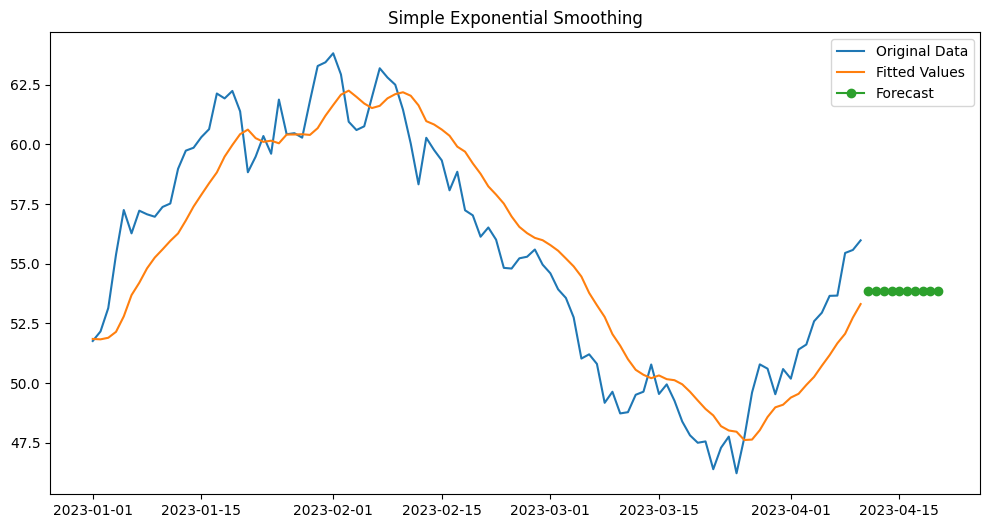

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# 예제 데이터 생성
np.random.seed(0)
data = np.random.randn(100).cumsum() + 50
index = pd.date_range(start='2023-01-01', periods=100, freq='D')
series = pd.Series(data, index)

# 단순 지수평활 모델
model = SimpleExpSmoothing(series, initialization_method='estimated').fit(smoothing_level=0.2, optimized=False)

# 예측
forecast = model.forecast(10)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Data')
plt.plot(model.fittedvalues, label='Fitted Values')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()


#### Python - 이중 지수 평활

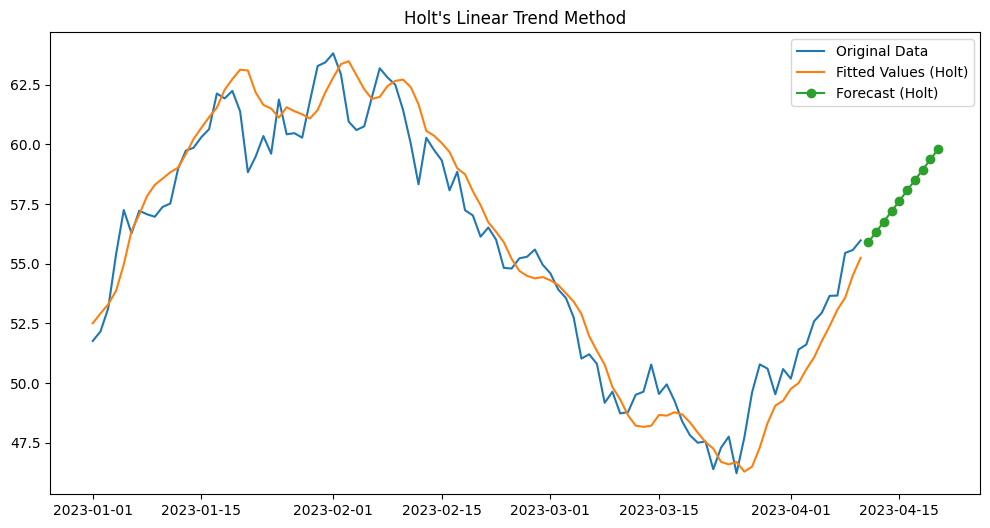

In [2]:
from statsmodels.tsa.api import Holt

model_holt = Holt(series, initialization_method='estimated').fit(smoothing_level=0.3, smoothing_trend=0.1, optimized=False)
forecast_holt = model_holt.forecast(10)

plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Data')
plt.plot(model_holt.fittedvalues, label='Fitted Values (Holt)')
plt.plot(forecast_holt.index, forecast_holt, label='Forecast (Holt)', marker='o')
plt.title("Holt's Linear Trend Method")
plt.legend()
plt.show()

#### Python - 삼중 지수 평활

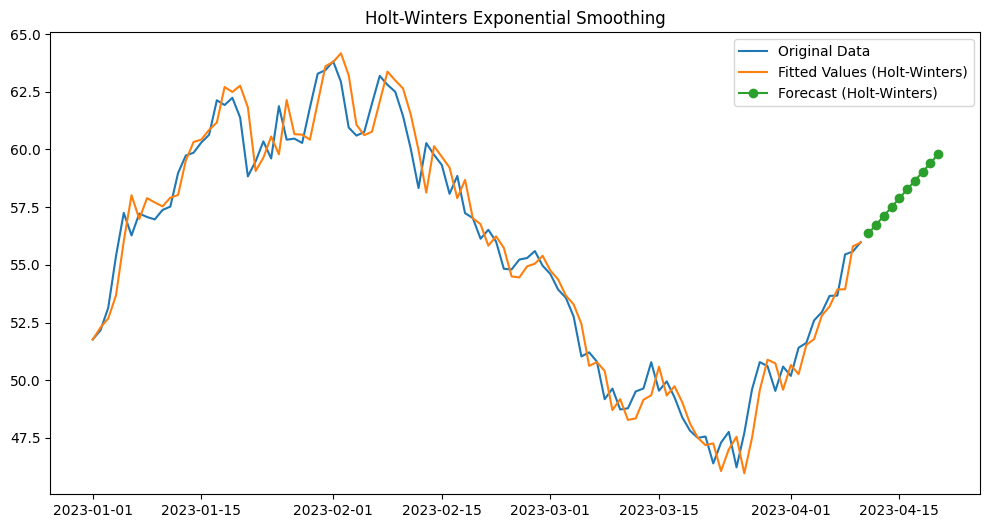

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing

model_hw = ExponentialSmoothing(series, trend='add', seasonal=None, initialization_method='estimated').fit()
forecast_hw = model_hw.forecast(10)

plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Data')
plt.plot(model_hw.fittedvalues, label='Fitted Values (Holt-Winters)')
plt.plot(forecast_hw.index, forecast_hw, label='Forecast (Holt-Winters)', marker='o')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()



## 2. **딥러닝 기반 시계열 모델링**  
**주요 모델**  
- **LSTM/GRU**: 순차적 의존성 학습, 장기 패턴 포착
- **CNN**: 지역적 패턴 추출, 1D 합성곱 활용
- **Transformer**: Self-Attention 메커니즘으로 장기 종속성 해결
- **Hybrid 모델**: LSTM+CNN 조합 등 복합 구조 활용

**장점**  
- **비선형 관계 학습**: 복잡한 시계열 패턴 자동 추출
- **대규모 데이터 처리**: 수백만 개 이상의 데이터셋 효율적 학습
- **다변량 분석**: 변수 간 상호작용 동시 모델링

**단점**  
- **데이터 양 의존성**: 소규모 데이터에서 과적합 위험
- **해석 난해성**: 블랙박스 특성으로 결과 분석 어려움
- **계산 리소스 요구**: GPU 가속 없을 경우 학습 시간 급증

---



## 3. **통계 vs 딥러닝 모델 비교**  
| 기준                | 통계 모델                          | 딥러닝 모델                      |
|---------------------|-----------------------------------|---------------------------------|
| **데이터 규모**      | 소규모(~1만 개)                   | 대규모(10만 개 이상)            |
| **해석성**          | 매개변수 기반 명확한 해석          | 블랙박스 특성                  |
| **계산 비용**        | CPU 기반 실시간 예측 가능          | GPU 활용 필수적                |
| **비선형성 처리**    | 제한적                            | 우수함                         |
| **전처리 복잡도**    | 정상화 필수                       | Raw 데이터 직접 처리 가능      |

---



## 4 **모델 선택 예**  
### 목적별 선택
1. **설명력 중시**  
   - 재무 리스크 평가, 정책 효과 분석 → **ARIMA/SARIMA**
2. **복잡한 패턴 예측**  
   - 에너지 수요 예측, 주가 변동성 분석 → **LSTM-Transformer Hybrid**  
3. **실시간 처리**  
   - IoT 센서 데이터 모니터링 → **지수평활법**
4. **다변량 상관관계**  
   - 기후 변화 모델링 → **Graph Neural Network**

### 데이터 크기별 권장 모델
| 데이터 크기      | 권장 접근법(예)                     |
|------------------|--------------------------------|
| ~1만 개         | SARIMA + 계절성 분해           |
| 1~10만 개       | Prophet + LightGBM            |
| 10만 개 이상    | Transformer 기반 시계열 모델   |

### 문제 복잡도 고려
- 단순 주기성: STL 분해 + ARIMA
- 비선형 패턴: N-BEATS(Neural Basis Expansion)
- 장기 의존성: Informer(Transformer 변형)

### 하이브리드 접근
- 전처리 + 딥러닝: 차분/로그 변환으로 정상화 후 LSTM 적용
- 다단계 모델링:
   - 1단계: ARIMA로 추세/계절성 제거
   - 2단계: 잔차(residual)에 LSTM 적용
---
